<center> <h1> Lecture 7: Autoregressive Models and Attention </h1> </center>
<center> Jillian Fisher, Zaid Harchaoui </center>
    <center> Data 598 (Winter 2023), University of Washington </center>

In this lecture, we will talk about models which deal with sequential data, and the method of attention.


This notebook is inspired by the [D2L book](https://d2l.ai/),  and adapted from lecture material created by Krishna Pillutla.
Other sources used:
https://medium.com/swlh/a-simple-overview-of-rnn-lstm-and-attention-mechanism-9e844763d07b
https://machinelearningmastery.com/the-attention-mechanism-from-scratch/

## Autoregressive Models

We will focus on autoregressive models as they capture the essence of modeling sequences. 

Suppose we have a sequence $x_1, x_2, \cdots$, for example, a sequence of words which make up a novel. 

Given a certain part of the sequence, we aim to model the upcoming (and unseen) parts of the sequences. That is, we aim to model 
$$
    x_t \sim P(\cdot \, | \, x_{t-1}, \cdots, x_1) .
$$
![](https://miro.medium.com/max/1734/1*_MrDp6w3Xc-yLuCTbco0xw.png)

**Latent Autoregressive Models**:
We assume that the data $(x_1, \cdots, x_{t-1})$ is summarized by a *latent state* or *hidden state* $h_t$. The model is 
$$
    x_t \sim P(\cdot | h_t)
$$
and the hidden state is updated based on the previous hidden state $h_t$ and the data $x_t$ at this time step as 
$$
    h_{t+1} = g(x_t, h_t) 
$$
for some function $g$. 

The **key modeling assumption** is that $h_t$ is a fixed dimensional vector independent of the length $t$ of the sequence observed so far. 

![](http://d2l.ai/_images/sequence-model.svg)

**Note**: Hidden Markov Models (HMMs) are special instances of latent autoregressive models as well. In this case, the hidden state is updated in a stochastic manner independent of $x_t$, i.e., $h_{t+1} \sim P_{\text{transition}}( \cdot | h_t)$, where $P_{\text{transition}}$ is called the transition kernel.

## Example of Autogressive Models: RNN
Recurrent Neural Networks (RNNs) are a generalization of multi-layer perceptrons (MLPs) to the case of sequential data. Here, the hidden state update function $g(x_t, h_t)$ from above is parameterized with learnable parameters. 


![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/rnn-vs-fnn.png)

### For more in-depth information and examples of RNN check out the optional demo from this week!

# Part 1: Introducing Attention
"Attention" was introduced in 2015 as a solution for problems in machine translation. Specifically, they were introduced to help solve alignment issues; identifying which parts of the input are relevant to the words in the output (the translation). When using RNN's, we have a way to pass along all the information from the input (encoding phase), but when the model is actually asked to make a decision (deconding phase), does it really need all the information from the input? What if the input is really long? This is where "attention" comes in handy. 

Attention ...

![](https://miro.medium.com/max/720/1*B33MU-QFnkTngXklABfJnw.webp)

The vanilla encoder-decoder models, gives the model a *compressed summary* of all the information it received from the input (final output later of the encoder). However, when we use attention, the at decoding time the model receives all the hidden states from the encoder process and then decides which ones is *most informative before* making it's decision.

### **Calculating Context Vector**

It decides on how informative each hidden model is by using a neural network to "learn" which hidden encoder to attend to. 
Shown below, the decoder receives all the hidden layer from the encoder $h_i$ and combines this will the previous hidden state from the decoders $s_i$. It uses this information to produce $a_i$, the amount of attention. 

***Steps***

1. Use a forwardfeed neural network to take the encoder hidden state $h_i$ and previous decoder output $s_{t-1}$ to compute a score $e_{t,i}$ that indicates how well the input from that hidden state aligns with current output position. 

$$
e_{t,i} = ff(s_{t-1}, h_i)
$$

2. Softmax to get a probability

$$
a_{t,i} = \text{softmax}(e_{i,t})
$$

3. Create the context vector by computing the weighted sums of all $H$ encoder hidden states. 

$$
c_t = \sum_{j=1}^H \alpha_{t,j}h_j
$$

![](https://miro.medium.com/max/720/1*TPlS-uko-n3uAxbAQY_STQ.webp)

**More General Framework**
Today, we use attention mechanisms in many models (beyond RNN's), therefore there is a more general attention mechanism framework. It considers three main components, queries $Q$, keys $K$, and values $V$. Below are the steps using these components. 

***Steps***

1. Each query vector $q$ is "matched" against a database of keys $k_i$ to compute a score value (using the dot product). 

$$
e_{q,k_i} = q \cdot k_i
$$

2. The scores are passed through a softmax to get a probability.

$$
a_{q,k_i} = \text{softmax}(e_{q,k_i})
$$

3. The attention is computed by a weighted sums of the value vectors $v_{k_i}$ (using the scores $a_{q,k_i}$).

$$
\text{attention}(q,K,V) = \sum_{j} \alpha_{q,k_i}v_{k_i}
$$

![Reference: https://towardsdatascience.com/transformers-in-action-attention-is-all-you-need-ac10338a023a#5cb5](https://miro.medium.com/max/720/1*Uya6_ec79IIXOkvPbGOQ-g.webp)

![Reference: https://towardsdatascience.com/transformers-in-action-attention-is-all-you-need-ac10338a023a#5cb5](https://miro.medium.com/max/640/1*XE8ws8z4KXW5vWXp1r2UbA.webp)

**CHALLENGE**: Can you map the RNN attention mechanism to the generalized mechanism. Specifically, how to the components match between the two mechanisms? 

### Simple Example of Attention Calculation

In [1]:
import numpy as np
import random

# Create and process data

# encoder representations of four different words
word_1 = np.array([1, 0, 0])
word_2 = np.array([0, 1, 0])
word_3 = np.array([1, 1, 0])
word_4 = np.array([0, 0, 1])

# generating the weight matrices
np.random.seed(42) # to allow us to reproduce the same attention values
W_Q = np.random.randint(3, size=(3, 3))
W_K = np.random.randint(3, size=(3, 3))
W_V = np.random.randint(3, size=(3, 3))

# generating the queries, keys and values
query_1 = word_1 @ W_Q
key_1 = word_1 @ W_K
value_1 = word_1 @ W_V

query_2 = word_2 @ W_Q
key_2 = word_2 @ W_K
value_2 = word_2 @ W_V

query_3 = word_3 @ W_Q
key_3 = word_3 @ W_K
value_3 = word_3 @ W_V

query_4 = word_4 @ W_Q
key_4 = word_4 @ W_K
value_4 = word_4 @ W_V

In [3]:
# Step 1: scoring the first query vector against all key vectors
scores = np.array([np.dot(query_1, key_1), np.dot(query_1, key_2), np.dot(query_1, key_3), np.dot(query_1, key_4)])
print("Scores: ", scores)

[ 8  2 10  2]


In [4]:
# Step 2: computing the weights by a softmax operation
def softmax(x):
    return(np.exp(x)/np.exp(x).sum()) 
    
weights = softmax(scores / key_1.shape[0] ** 0.5)
print("Weights: ", weights)

Weights:  [0.23608986 0.00738988 0.74913039 0.00738988]


In [5]:
# Step 3: computing the attention by a weighted sum of the value vectors
attention = (weights[0] * value_1) + (weights[1] * value_2) + (weights[2] * value_3) + (weights[3] * value_4)

print("Attention: ", attention)

Attention:  [0.98522025 1.74174051 0.75652026]


# Part 2: Motivating Attention with Nearest Neighbors

The $k$-nearest neighbor approach to classification or regression is a classical non-parametric one. 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7MVakzuS-7Brmn4pNfsK0l8cYz2kbkevInA&usqp=CAU)

We consider the regression setting with labeled input-output pairs $(x_1, y_1), \cdots, (x_n, y_n) \in \mathbb{R}^d \times \mathbb{R}^m$. Given a query point $x' \in \mathbb{R}^d$, the $k$-nearest neighbor regression makes the prediction
$$
    y' = \frac{1}{k} \sum_{i \in N_k(x')} y_i \,,
$$
where $N_k(x') = \{i_1, \cdots i_k\}$ denotes the indices of the $k$ $x_i$'s nearest to the query point $x'$.


In this example, we use scalar-valued $x$ and $y$ (i.e., input dimension $d=1$ and output dimension $m=1$).
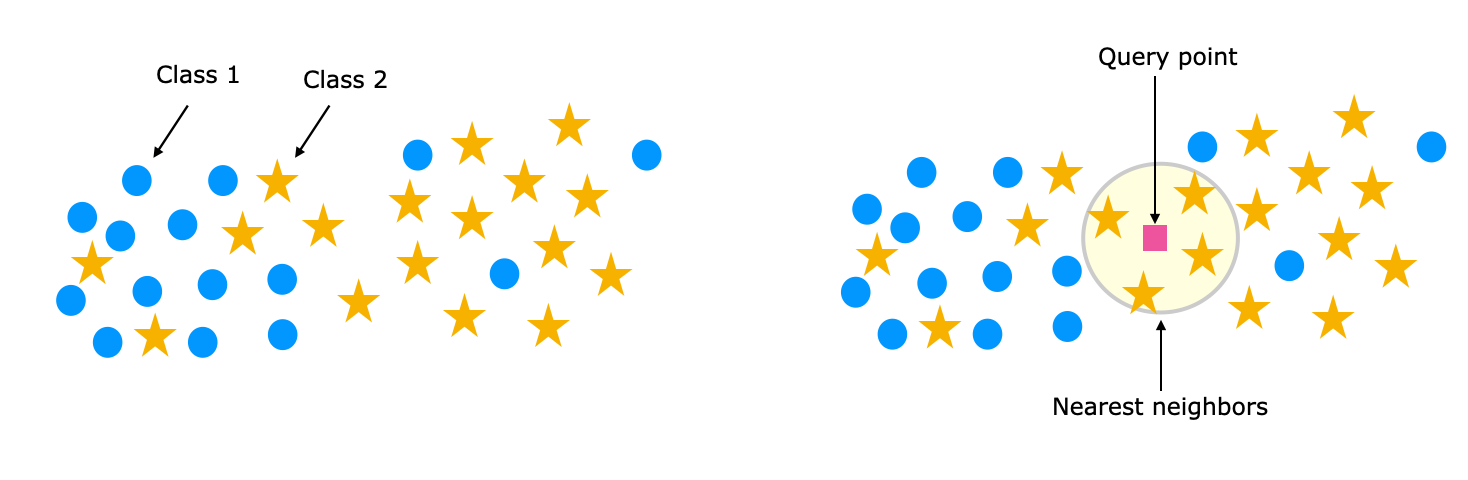

Text(0, 0.5, '$y$')

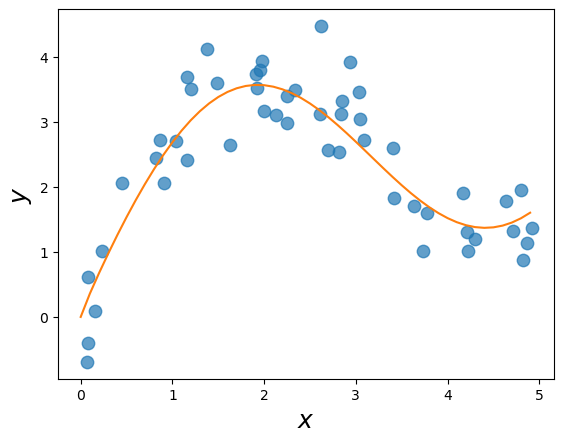

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_train = 50  # No. of training examples
x_train = np.sort(np.random.rand(n_train) * 5)   # Training inputs

def f(x):
    return 2 * np.sin(x) + x**0.8

y_train = f(x_train) + np.random.normal(0.0, 0.5, (n_train,))  # Training outputs

x_test = np.arange(0, 5, 0.1)  # Testing examples
y_truth = f(x_test)  # Ground-truth outputs for the testing examples
n_test = len(x_test)  # No. of testing examples

plt.plot(x_test, y_truth, color='C1')

plt.scatter(x_train, y_train, alpha=0.7, color='C0', s=80)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)


We will implement the $k$-nearest neighbor regression as follows. Given a query point $x'$ and number of neighbors $k$, we 
- compute the distances $|x_i-x'|$ for each training point, 
- sort these distances and find the nearest neighbor set $N_k(x') = \{i_1, \cdots i_k\}$ denotes the indices of the $k$ $x_i$'s nearest to the query point $x'$, 
- return the average of their outputs, i.e., 
$$
    y' = \frac{1}{k} \sum_{i \in N_k(x')} y_i \,.
$$

In [7]:
def knn_regression(k, x_query):
    # Assume x_query is a single query point (1D)
    distances = np.abs(x_train - x_query)
    idxs = np.argsort(distances)[:k]  # k-NN indices
    return y_train[idxs].mean()  # average y over indices

y_pred = [knn_regression(3, xq) for xq in x_test]

Text(0, 0.5, '$y$')

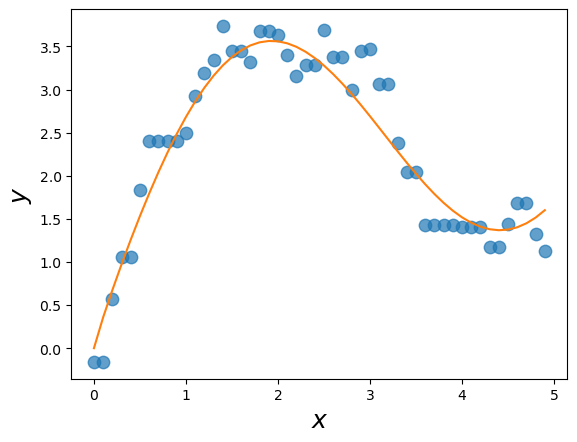

In [8]:
plt.plot(x_test, y_truth, color='C1')
plt.scatter(x_test, y_pred, color='C0', s=80, alpha=0.7,)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)


## From kNN to Attention

Given input-output pairs $(x_1, y_1), \cdots, (x_n, y_n) \in \mathbb{R}^d \times \mathbb{R}^m$ and a query point $x'$, 
a general attention mechanism returns the output
$$
     p(x') = \sum_{i=1}^n S(x_i, x') y_i \,,
$$
where $S(x_i, x')$ is some measure of similarity between $x_i$ and $x'$. 

Here,  the $x_i$'s are called *keys*, and the $y_i$'s are called values. The query point $x'$ is compared against each of the $n$ keys; their similarity weight $S(x_i, x')$ scales is the weight of the contribution of the corresponding values $y_i$.

**Exercise**: Instantiate the similarity function $S(x_i, x)$ corresponding to the $k$-NN model.

In this lecture, we focus on **scaled dot-product attention**, where the similarity function is defined as
$$
    S(x_i, x') \propto \exp\left(\frac{x_i^\top x'}{\sqrt{d}}\right) \,.
$$
Here, the scores are normalized to sum to $1$ (so that we actually take a weighted _average_, not just a weighted sum), and $d$ is the dimensionality of the key $x_i$ and the query $x'$. 

**Exercise ($\sqrt{d}$-scaling)**: If the entries of $x_i$ and $x'$ are all independent and identically distributed as $N(0, 1)$ (i.e., standard normal), then show that $x_i^\top x'$ has mean zero and standard deviation $\sqrt{d}$. 
Therefore, the $\sqrt{d}$-scaling in the attention definition is just a normalization so that the similarity weights $S(x_i, x')$ are less dependent on the dimension $d$.

**Definition of scaled dot-product attention**: 
Given input-output pairs $(x_1, y_1), \cdots, (x_n, y_n) \in \mathbb{R}^d \times \mathbb{R}^m$ and a query point $x'$, 
the scaled dot product attention returns the output
$$
    p(x') = \frac{\sum_{i=1}^n \exp\left( \frac{x_i^\top x'}{\sqrt{d}} \right) y_i}{\sum_{i=1}^n \exp\left(\frac{x_i^\top x'}{\sqrt{d}}\right)} .
$$


# Part 2: Parametric Attention and Self-Attention

Given a set of objects, $o_1, \cdots, o_n$, a self-attention module applies linear transformations to get a key $x_i = W_k^\top o_i$, a value $y_i = W_v^\top o_i$ and a query $x_i' = W_q^\top o_i$.

<div>
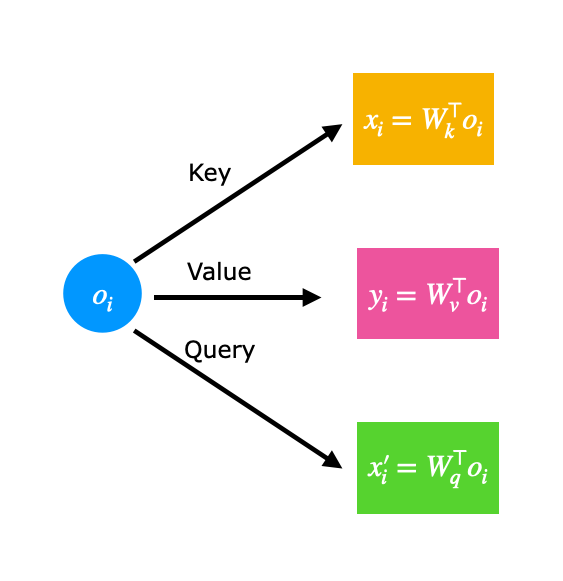
</div>



The self-attention layer processes inputs in parallel, i.e., $S(x_i, x')$ can be computed for all $i$ in parallel. 
This is in contrast to recurrent neural networks, which process the data sequentially. 


## Visualizing Attention Weights in BERT

In [9]:
import seaborn as sns 
import torch

In [10]:
from transformers import BertTokenizer, BertModel

model_name = 'bert-base-uncased'
# Download the pre-trained model + tokenizer (a total of 440 MB)
tokenizer = BertTokenizer.from_pretrained(model_name) # to tokenize the text
model = BertModel.from_pretrained(model_name, output_attentions=True)  # PyTorch module

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# sentence = "I love hiking in the tall and snowy mountains"
# sentence = "The animal did not cross the street because it was too tired"
sentence = "The tenacious student analyzed the logistic regression model thoughtfully"

# Let us tokenize them 
tokens = tokenizer.encode(sentence, return_tensors='pt')
tokenized_sentence = ["<START>"] + tokenizer.tokenize(sentence) + ["<END>"]
print(tokens.shape)
print(tokenized_sentence)
print(tokens, '\n')
# Note: 101 is the <START> token and 102 is the <END> token

with torch.no_grad():
    out = model(tokens)
attention_weights = out.attentions  # 12 attention maps for each layer in the networks

last_layer_attention_weights = attention_weights[-1]
print(last_layer_attention_weights.shape)  # 12 attention heads (i.e., 12 different key-value-query representations for each token)



torch.Size([1, 13])
['<START>', 'the', 'ten', '##acious', 'student', 'analyzed', 'the', 'log', '##istic', 'regression', 'model', 'thoughtfully', '<END>']
tensor([[  101,  1996,  2702, 20113,  3076, 16578,  1996,  8833,  6553, 26237,
          2944, 19897,   102]]) 

torch.Size([1, 12, 13, 13])


In [12]:
attention_weights = torch.cat(attention_weights).detach() # (layer, attn_head, seq_len, seq_len)

num_layers, num_heads, seq_len, _ = attention_weights.shape

attention_weights = attention_weights.permute(2,0,1,3)  # (seq_len, layer, attn_head, seq_len)


Word at position: regression


Text(50.722222222222214, 0.5, 'Head')

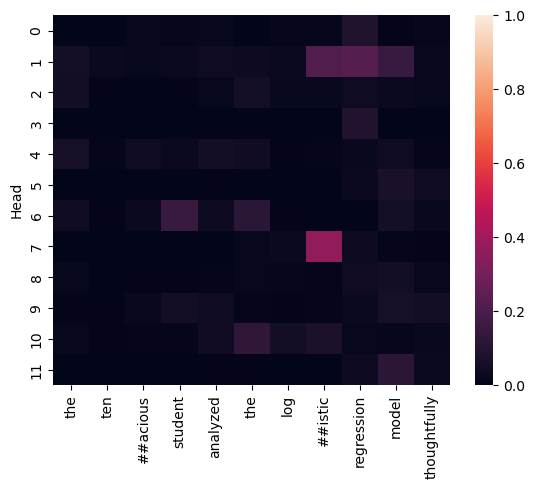

In [13]:
pos = 9
print("Word at position:", tokenizer.decode([tokens[0][pos]]))
attentions_at_pos = attention_weights[pos]

avg_attention = attentions_at_pos[4]  # Choose a certain layer
avg_attention = avg_attention[:, 1:-1]  # Drop start and end tokens
sns.heatmap(avg_attention,vmin=0, vmax = 1, xticklabels=tokenized_sentence[1:-1])

plt.ylabel("Head")